## Data Wrangling: Clean, Transform, Merge, Reshape

In [14]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [15]:
%matplotlib inline

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

## Combining and merging data sets

### Database-style DataFrame merges

In [12]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1
df2

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
# natural join : key 가 같은 컬럼 끼리 조인함 (조인가능한 것만 조인시킴)
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
# 키를 지정해서 조인시킴 
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [13]:
# full outer join : 외부 조인 없는 값이면 추가해줘서 모두다 나오게 함 
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


 NaN 값 때문에 data 값이 float 로 바뀜 

In [14]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
df1
df2

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [15]:
# left outer join 
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [18]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [20]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
left
right
pd.merge(left, right, on=['key1', 'key2'], how='outer') # join key 2개 이상 사용, full outer join 

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [21]:
# 같은 컬럼 이름엔 _x, _y 값을 자동으로 붙여줌 
pd.merge(left, right, on='key1') 

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [22]:
# suffixes 같은 컬럼에 원하는 이름을 붙여줌 
pd.merge(left, right, on='key1', suffixes=('_left', '_right')) 

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index

In [23]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1
right1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


,group_val
a,3.5
b,7.0


In [24]:
# 왼쪽에서는 컬럼, 오른쪽은 index 를 이용해서 join 
pd.merge(left1, right1, left_on='key', right_index=True) 
#right_on = 'key'  동일한 결과 

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [25]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [26]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})

# 계층 인덱스를 가짐 
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth
righth 

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [27]:
# 다중 키값과 멀티 index 를 사용해서 join 시킴 
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [28]:
# 다중 키값과 멀티 index 를 사용해서 full outer join 시킴 
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [29]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
left2
right2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [30]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


join method 사용 <br>
index 에 대한 join 이 자동으로 이뤄짐 <br>
left2.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [31]:
left2.join(right2, how='outer') 

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [32]:
# key 컬럼으로 join 함 
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [33]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [34]:
# 3개의 table 을 join 시킴 
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [35]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating along an axis

numpy

In [37]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
np.concatenate([arr, arr])
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

pandas

In [40]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])
s1
s2
s3

a    0
b    1
dtype: int64

c    2
d    3
e    4
dtype: int64

f    5
g    6
dtype: int64

In [41]:
pd.concat([s1, s2, s3]) # 리스트로 묶어 줘야 함 

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [42]:
pd.concat([s1, s2, s3], axis=1) # dataframe 으로 붙음 

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [45]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [46]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [47]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [48]:
# join_axes : index list 의 객체를 받아서 index 로  join (set logic)
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [50]:
# s1 을 one 으로 묶음
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result
type(result)

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

pandas.core.series.Series

In [51]:
# row 인덱스를 column 의 인덱스로 만들어 줌 
# Much more on the unstack function later
result.unstack() 

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [52]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [53]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [54]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [55]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [56]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1
df2

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221


,b,d,a
0,0.274992,0.228913,1.352917
1,0.886429,-2.001637,-0.371843


In [57]:
# 원래 가지고 있던 index 를 무사히고 붙임 
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


### Combining data with overlap

겹치는 키가 있는 경우 

In [58]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a
b

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [59]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [63]:
#combine_first (update and insert)
# 데이터를 인덱스순으로 정렬함 
# 충돌되는 값은 b 를 우선으로함 없는 값은 추가 
b[:-2].combine_first(a[2:]) # b[f,e,d,c] c[d,c,b,a] 

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [65]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1
df2
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and pivoting

### Reshaping with hierarchical indexing

표형식의 데이터를 재배치함 

In [68]:
# pd.Index 객체를 넣어줌 (multi index 인경우 multi 객체를 이용)

data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [72]:
# stack 을 하게 되면 Serise 가 됨 
result = data.stack()
result
type(result)

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

pandas.core.series.Series

In [78]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [71]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [79]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [80]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
s1
s2
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2
data2.unstack()

a    0
b    1
c    2
d    3
dtype: int64

c    4
d    5
e    6
dtype: int64

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [83]:
# Null 값 때문에 실수로 바뀜 (null 값이 사라지면 int 로 변경됨)
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [85]:
# null 값도 나오게 하고 싶을 때
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [86]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [89]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [90]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "long" to "wide" format

In [98]:
data = pd.read_csv('data/ch07/macrodata.csv')
data
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end')) # 마지막 날짜를 기준으로 data 를 만듬 
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2
1960-06-30,2834.390,0.14,5.2
1960-09-30,2839.022,2.70,5.6
1960-12-31,2802.616,1.21,6.3
1961-03-31,2819.264,-0.40,6.8


In [99]:
data.stack().reset_index()

,date,item,0
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [101]:
ldata = data.stack().reset_index().rename(columns={0: 'value'}) # 0 값을 value 로 바꾸겠다. 
wdata = ldata.pivot('date', 'item', 'value') # index, column, data 
ldata[:10]
wdata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2
1960-06-30,0.14,2834.390,5.2
1960-09-30,2.70,2839.022,5.6
1960-12-31,1.21,2802.616,6.3
1961-03-31,-0.40,2819.264,6.8


In [102]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [103]:
ldata['value2'] = np.random.randn(len(ldata)) # 길이만큼의 랜덤값 추가 
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,1.669025
1,1959-03-31,infl,0.000,-0.438570
2,1959-03-31,unemp,5.800,-0.539741
3,1959-06-30,realgdp,2778.801,0.476985
4,1959-06-30,infl,2.340,3.248944
5,1959-06-30,unemp,5.100,-1.021228
6,1959-09-30,realgdp,2775.488,-0.577087
7,1959-09-30,infl,2.740,0.124121
8,1959-09-30,unemp,5.300,0.302614
9,1959-12-31,realgdp,2785.204,0.523772


In [104]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232

In [105]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [106]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232
1960-06-30  0.14  2834.390   5.2 -0.860757 -1.860761  0.560145
1960-09-30  2.70  2839.022   5.6  0.119827 -1.265934 -1.063512

## Data transformation

### Removing duplicates

In [107]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [109]:
data.duplicated() # 위에서 부터 동일한 값이 있는지 검사 

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [110]:
data.drop_duplicates() 

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [112]:
 # 값을 지정해서 그 값에 대한 중복만 확인 
data['v1'] = range(7)
data
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


,k1,k2,v1
0,one,1,0
3,two,3,3


In [113]:
#data.drop_duplicates(['k1', 'k2'], take_last=True)
data.drop_duplicates(['k1', 'k2'], keep='last') # 중복값중 마지막 값만 유지 기본값 first

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming data using a function or mapping

In [114]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [115]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

map 함수 사용 

In [120]:
%timeit data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # key 값 기준으로 적용함 
data

1000 loops, best of 3: 611 µs per loop


,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


500 번 처리 하고 -> 500 번 처리 함

In [121]:
# lambda 를 사용하여 처리 meat_to_animal[key 값]
%timeit data['food'].map(lambda x: meat_to_animal[x.lower()]) 

The slowest run took 7.94 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 109 µs per loop


몇몇 값은 느리고 빠르고 cache 사용 <br>
500 번 처리를 하는데 안에서 루프를 돌림 

### Replacing values

In [122]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [123]:
# -999 를 null 값으로 변경해라 
data.replace(-999, np.nan)  # data[data==-999] = np.nan

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [126]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [127]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [128]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming axis indexes

In [130]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [131]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [132]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [133]:
# rename 을 사용해서 이름을 한번에 함수를 적용 
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [134]:
# rename 을 사용해서 이름을 변경 (key  값은 대소문자를 구분함)
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [135]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data # inplace=True 데이터의 원본 속성이 바뀜 

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and binning

이산화 와 담기

연속 vs 이산 (continuous vs discrete) 

In [137]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]  # 범위 ( 미포함 ) [ 포함 ]
cats = pd.cut(ages, bins) # cut 함수를 이용해서 값을 분류 Categories 객체 
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [140]:
#cats.labels
cats.codes # 각 숫자들이 몇번째 범위에 있는지 나타냄 

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

(18, 25], 0 번째 범위 (25, 35], 1 번쨰 범위

In [143]:
#cats.levels
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [144]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [145]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False) # , right=False close, open 형태가 됨 

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [146]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [149]:
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64

In [152]:
# cut 길이를 균등하게 
data = np.random.rand(20)
pd.cut(data, 4, precision=2) # 4 등분 시킴 
pd.value_counts(pd.cut(data, 4, precision=2))

# precision 유효숫자 소숫점 이하 두째자리 0.0037 은 0.37 * 10^3 

[(0.5, 0.74], (0.26, 0.5], (0.26, 0.5], (0.74, 0.98], (0.016, 0.26], ..., (0.26, 0.5], (0.74, 0.98], (0.5, 0.74], (0.26, 0.5], (0.5, 0.74]]
Length: 20
Categories (4, interval[float64]): [(0.016, 0.26] < (0.26, 0.5] < (0.5, 0.74] < (0.74, 0.98]]

(0.016, 0.26]    6
(0.5, 0.74]      5
(0.26, 0.5]      5
(0.74, 0.98]     4
dtype: int64

In [154]:
catal = pd.cut(data, 5) # precision=3 기본값
data
catal
pd.value_counts(catal)

array([ 0.5046,  0.4369,  0.376 ,  0.7779,  0.1001,  0.0165,  0.7824,
        0.8532,  0.2237,  0.6269,  0.0647,  0.2389,  0.4598,  0.6627,
        0.2177,  0.4699,  0.9783,  0.5131,  0.4701,  0.6661])

[(0.401, 0.594], (0.401, 0.594], (0.209, 0.401], (0.594, 0.786], (0.0155, 0.209], ..., (0.401, 0.594], (0.786, 0.978], (0.401, 0.594], (0.401, 0.594], (0.594, 0.786]]
Length: 20
Categories (5, interval[float64]): [(0.0155, 0.209] < (0.209, 0.401] < (0.401, 0.594] < (0.594, 0.786] < (0.786, 0.978]]

(0.401, 0.594]     6
(0.594, 0.786]     5
(0.209, 0.401]     4
(0.0155, 0.209]    3
(0.786, 0.978]     2
dtype: int64

In [155]:
# qcut 데이터의 개수가 균등하게 
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats
pd.value_counts(cats)

[(-0.0206, 0.634], (-3.746, -0.633], (-0.0206, 0.634], (-0.633, -0.0206], (-0.0206, 0.634], ..., (-3.746, -0.633], (-0.633, -0.0206], (0.634, 3.26], (-3.746, -0.633], (0.634, 3.26]]
Length: 1000
Categories (4, interval[float64]): [(-3.746, -0.633] < (-0.633, -0.0206] < (-0.0206, 0.634] < (0.634, 3.26]]

(0.634, 3.26]        250
(-0.0206, 0.634]     250
(-0.633, -0.0206]    250
(-3.746, -0.633]     250
dtype: int64

In [157]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]) 
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))

[(-0.0206, 1.302], (-3.746, -1.254], (-0.0206, 1.302], (-1.254, -0.0206], (-0.0206, 1.302], ..., (-1.254, -0.0206], (-1.254, -0.0206], (1.302, 3.26], (-1.254, -0.0206], (1.302, 3.26]]
Length: 1000
Categories (4, interval[float64]): [(-3.746, -1.254] < (-1.254, -0.0206] < (-0.0206, 1.302] < (1.302, 3.26]]

(-0.0206, 1.302]     400
(-1.254, -0.0206]    400
(1.302, 3.26]        100
(-3.746, -1.254]     100
dtype: int64

### Detecting and filtering outliers

In [158]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [159]:
col = data[3]
col[np.abs(col) > 3] 

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

(abs) 유니버설함수는 한번에 다 적용 가능함 (유니버설이 아닌경우 map 함수를 사용)

In [161]:
data[(np.abs(data) > 1).all(1)]

# row의 컬럼 중에 하나라도 3 초과인 값들 #data[np.abs(data) > 3]

,0,1,2,3
131,1.297622,-1.686933,1.089539,2.060882
398,-1.115689,1.234297,-1.893094,-1.661605
427,-1.276761,1.881156,1.108227,-1.751994
565,1.502867,-1.400992,1.105131,-1.123506
620,-1.026410,1.097896,-2.216861,-1.681929
639,-1.198140,-1.027268,-1.525054,-1.955038
697,1.190274,1.800285,-2.207419,-2.651879
737,1.101240,1.134073,1.073032,-1.073461
772,1.178483,1.063616,1.229272,-1.077152
857,1.522475,1.098180,1.116874,-1.591605


In [165]:
# 숫자 데이터의 부호를 return -1, 0, 1
# 절대 값이 3 이상 또는 이하인 경우 값을 -3, 3 으로 변경해줌 
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()
data.head(5)

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


### Permutation and random sampling
치환 과 샘플링 

In [166]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [167]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [168]:
df.take(sampler) # 순서를 바꾸고 싶은 sampler 순으로 

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [169]:
df.take(np.random.permutation(len(df))[:3]) #바꾸고 싶은 길이만큼만 적용함 

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [187]:
arr = np.arange(9).reshape((3, 3))
arr
np.random.permutation(arr)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

In [171]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10) 
# 정수값을 뽑는데 0~row 갯수 까지 10번 뽑음 독립 사건
sampler 

array([1, 2, 3, 0, 1, 2, 2, 3, 2, 1])

In [172]:
# bag 에 들어 있는 값을 sampler 순으로 10개를 뽑음 
draws = bag.take(sampler)
draws
bag[sampler]

array([ 7, -1,  6,  5,  7, -1, -1,  6, -1,  7])

array([ 7, -1,  6,  5,  7, -1, -1,  6, -1,  7])

* 로또 번호 생성기 

In [223]:
lotto = np.arange(1, 46)
lotto
a = np.random.permutation(lotto)[:6]
a.sort()
np.random.randint(1, 46, size=6)

lottos = Series(np.arange(5))\
                .map(lambda x : np.sort(np.random.permutation(lotto, )[:6]))
lottos
#lottos.map(lambda x : np.sort(x))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

array([12, 35, 25, 22, 23, 34])

0     [8, 12, 20, 23, 29, 37]
1    [13, 26, 27, 30, 42, 44]
2     [7, 16, 20, 23, 28, 30]
3     [3, 11, 14, 22, 25, 37]
4       [1, 6, 7, 21, 37, 44]
dtype: object

### Computing indicator / dummy variables

In [225]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df
pd.get_dummies(df['key']) # a, b, c 중에 하나만 1 로 만들어 줌 (mask 같음)

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [226]:
dummies = pd.get_dummies(df['key'], prefix='key') # ['key'], Series 가 return 
dummies

 # 컬럼이 하나인 DF 를 만들어 join 을 사용 
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [227]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [234]:
%timeit
genre_iter = (set(x.split('|')) for x in movies.genres) # generator expression 
genres = sorted(set.union(*genre_iter)) # 값이 요청되면 만들어서 return 해줌 
genres

'''set.union ( ('Animation','Children\'s','Comedy'),('Children\'s','Comedy').... ))
순으로 들어가 있는 집합들을 만들고 set 으로 합집합 함 (* 모두 풀겠다. )'''

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [244]:
genre_iter = [x.split('|') for x in movies.genres] # generator expression 
genre_iter
genres = sorted(set(*genre_iter))
genres

[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', "Children's"],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Animation', "Children's"],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Thriller'],
 ['Comedy'],
 ['Action'],
 ['Action', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Romance'],
 ['Adventure', 'Sci-Fi'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Sci-Fi'],
 ['Adventure', 'Romance'],
 ["Children's", 'Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Documentary'],
 ['Comedy'],
 ['Comedy', 'Romance'],
 ['Drama'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Drama'],
 ['Action', 'Adventure'],
 ['Comedy'

TypeError: set expected at most 1 arguments, got 3883

In [241]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies.head(5) # 영행렬을 만들어 줌 

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1 # 더미 테이블에 각 row 에  해당하는 장르를 1로 채움 

In [246]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [248]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([ 0.9296,  0.3164,  0.1839,  0.2046,  0.5677,  0.5955,  0.9645,
        0.6532,  0.7489,  0.6536])

In [250]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins)) .sum() 

(0.0, 0.2]    1
(0.2, 0.4]    2
(0.4, 0.6]    2
(0.6, 0.8]    3
(0.8, 1.0]    2
dtype: int64

## String manipulation

### String object methods

In [251]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [252]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [253]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [254]:
'::'.join(pieces)

'a::b::guido'

In [255]:
'guido' in val

True

In [256]:
val.index(',')

1

In [257]:
val.find(':')

-1

In [269]:
try:
    val.index(':') # 없으면 에러남 
except  ValueError as v :
    print(v)

substring not found


In [259]:
val.count(',')

2

In [260]:
val.replace(',', '::')

'a::b::  guido'

In [267]:
val.replace(',', '')

'ab  guido'

### Regular expressions

In [1]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)
re.split(' ', text) # 공백이 2개 이상인 경우도 처리 하지 못함 

['foo', '', '', '', 'bar\t', 'baz', '', '\tqux']

In [2]:
# 컴파일해서 해당 패턴을 만들어 둠 
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [3]:
regex.findall(text)

['    ', '\t ', '  \t']

In [20]:
text = """dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
Ryan ryan@yahoo.comaaaaa
Ryan ryan@yahoo.co.kr
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# @[A-Z0-9.-] 에서 . 을 빼게 되면 co.kr 을 찾아 낼 수 없다. 

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE) # IGNORECASE 대소문자 무시 

* [A-Z0-9._%+-] : 글자 하나하나 매칭 cheracter list
* A-Z : 영문 대문자 모두 
* 0-9 : 숫자 모두 
* . _ % + - : 각각의 문자 
* [A-Z0-9._%+-]+@ : @ 문자 왼쪽에 패턴이 한번 이상 나오고 
* @[A-Z0-9.-]+ : @ 뒤에 패턴이 여러번 나오고 
* \.[A-Z]{2,4} : 점(.) 뒤에 A-Z 가 2 ~ 4번 나오는것

In [21]:
regex.findall(text)

['dave@google.com',
 'steve@gmail.com',
 'rob@gmail.com',
 'ryan@yahoo.com',
 'ryan@yahoo.coma',
 'ryan@yahoo.co.kr']

* search( )

In [22]:
m = regex.search(text) # 처음 찾는것 하나  
m

<_sre.SRE_Match object; span=(0, 15), match='dave@google.com'>

In [23]:
m.start()
m.end()
text[m.start():m.end()]

0

15

'dave@google.com'

* match( ) 

In [24]:
print(regex.match(text)) # 패턴이 문장의 처음에 나와야됨 

<_sre.SRE_Match object; span=(0, 15), match='dave@google.com'>


* 치환 

In [26]:
# regex 정규표현식 객체 
print(text)
print(regex.sub('REDACTED', text)) 

dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
Ryan ryan@yahoo.comaaaaa
Ryan ryan@yahoo.co.kr

REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED
Ryan REDACTEDaaaa
Ryan REDACTED



 * ( ) : 그룹을 만듬 

In [42]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
pattern1 = r'([A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
regex1 = re.compile(pattern1, flags=re.IGNORECASE)

In [53]:
# match 는 문장 처음 일치 여부, search 는 최초로 일치하는 것
m = regex.match('wesm@bright.net') 
m1 = regex1.match('wesm@bright.net') 
m.groups() # match 된 것의 목록을 return 
m1.groups() 
m.group(1) # 첫번째것 하나
m.group(0) # 전체 합친것 

('wesm', 'bright', 'net')

('wesm@bright.net',)

'wesm'

'wesm@bright.net'

In [44]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com'),
 ('ryan', 'yahoo', 'coma'),
 ('ryan', 'yahoo.co', 'kr')]

In [45]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text)) # 찾은 그룹을 재사용 함 

Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: comaaaaa
Ryan Username: ryan, Domain: yahoo.co, Suffix: kr



* < > : 태그 사용 해서 그룹에 이름을 붙여 사용 함

In [49]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [51]:
m = regex.match('wesm@bright.net')
m_dict = m.groupdict()
m_dict

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

In [52]:
m_dict['username']

'wesm'

### Vectorized string functions in pandas

In [55]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [64]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [65]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [57]:
# data 의 null 값 처리를 해야 함 
data[data.notnull()].map(regex.findall) 

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
dtype: object

In [60]:
df = DataFrame(data)
df
df[:-1].applymap(regex.findall)

,0
Dave,dave@google.com
Rob,rob@gmail.com
Steve,steve@gmail.com
Wes,NaN


,0
Dave,"[(dave, google, com)]"
Rob,"[(rob, gmail, com)]"
Steve,"[(steve, gmail, com)]"


In [71]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [72]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object

In [73]:
matches.str.get(0) # i 번째 요소를 반환 

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [74]:
matches.str[0]

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [75]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

## Example: USDA Food Database

음식의 영양소 정보 데이터 json 형식 

In [76]:
import json
db = json.load(open('data/ch07/foods-2011-10-03.json'))
len(db)

6636

In [78]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [84]:
# 첫번쨰 음식의 영양소 성분만 담음 
len(db[0]['nutrients'])
db[0]['nutrients'][2]

162

{'description': 'Carbohydrate, by difference',
 'group': 'Composition',
 'units': 'g',
 'value': 3.06}

In [82]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [98]:
#모든 음식에 대한 정보를 담음 
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)
info[info['manufacturer']!='' ]

,description,group,id,manufacturer
15,"Milk, reduced fat, fluid, 2% milkfat, with add...",Dairy and Egg Products,1079,None
47,"Sour cream, reduced fat",Dairy and Egg Products,1178,None
48,"Sour cream, light",Dairy and Egg Products,1179,None
49,"Sour cream, fat free",Dairy and Egg Products,1180,None
50,"USDA Commodity, cheese, cheddar, reduced fat",Dairy and Egg Products,1182,None
51,"Yogurt, vanilla or lemon flavor, nonfat milk, ...",Dairy and Egg Products,1184,None
54,"Yogurt, chocolate, nonfat milk",Dairy and Egg Products,1187,None
55,KRAFT CHEEZ WHIZ Pasteurized Process Cheese Sauce,Dairy and Egg Products,1188,None
56,KRAFT CHEEZ WHIZ LIGHT Pasteurized Process Che...,Dairy and Egg Products,1189,None
57,KRAFT FREE Singles American Nonfat Pasteurized...,Dairy and Egg Products,1190,None


In [96]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [103]:
nutrients = []

# rec : db 의 음식 목록들 
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

# 모든 음식에 들은 영양성분 테이블
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [102]:
nutrients

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [104]:
nutrients.duplicated().sum()

14179

In [106]:
# 처음 나온 값만 살리고 나머지는 지워짐 
nutrients = nutrients.drop_duplicates() 
len(nutrients)

375176

In [107]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [108]:
# 컬럼명 변경 
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [109]:
# 동등 Join 
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [110]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [111]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [118]:
ndata.nutrient.value_counts()

Energy                                13244
Carbohydrate, by difference            6636
Protein                                6636
Total lipid (fat)                      6636
Water                                  6632
Ash                                    6631
Sodium, Na                             6554
Iron, Fe                               6539
Calcium, Ca                            6527
Potassium, K                           6322
Fatty acids, total saturated           6318
Cholesterol                            6316
Vitamin A, IU                          6262
Vitamin C, total ascorbic acid         6232
Phosphorus, P                          6197
Riboflavin                             6195
Thiamin                                6175
Niacin                                 6167
Zinc, Zn                               6137
Magnesium, Mg                          6108
Fatty acids, total monounsaturated     6043
Fatty acids, total polyunsaturated     6043
Copper, Cu                      

* group by 

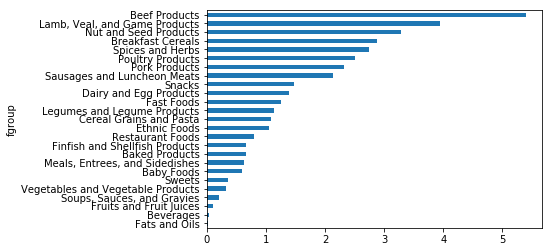

In [120]:
# 제품의 영양성분의 값의 중앙값
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) # 중앙값 0.5
result['Zinc, Zn'].sort_values().plot(kind='barh') 

In [125]:
type(result)

pandas.core.series.Series

In [126]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [130]:
type(by_nutrient.value)

pandas.core.groupby.SeriesGroupBy

In [128]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 